# Exploratory Data Analysis Practice with CIMIS data

Data Source - https://cimis.water.ca.gov/WSNReportCriteria.aspx

Book Resources:
Modern Statistics for Modern Biology. Chapter 3 High Quality Graphics in R. Susan Holmes, Wolfgang Huber. http://web.stanford.edu/class/bios221/book/Chap-Graphics.html

Packages:

> Summaries: 
Python: Pandas https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
 R: tidyverse https://dplyr.tidyverse.org/reference/summarise.html
Another R library: https://cran.r-project.org/web/packages/qwraps2/vignettes/summary-statistics.html

> Visualization:
Python: Plotly (interactive) https://plotly.com/python/
Python: Seaborn (ggplot alike) http://seaborn.pydata.org/tutorial.html
R: ggplot https://ggplot2.tidyverse.org 


Examples:
Visualization plots: Modern Statistics for Modern Biology. Chapter 3 High Quality Graphics in R. Susan Holmes, Wolfgang Huber. http://web.stanford.edu/class/bios221/book/Chap-Graphics.html
Misleading Axes on graphs: https://callingbullshit.org/tools/tools_misleading_axes.html

In [15]:
import math
import pandas as pd
import numpy as np
import datascience
from numpy import cov
import seaborn
import plotly as py
import plotlywidget
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
print('Done')

Done


WARNING: Upgrading ipython, ipykernel, tornado, prompt-toolkit or pyzmq can
cause your runtime to repeatedly crash or behave in unexpected ways and is not
recommended. If your runtime won't connect or execute code, you can reset it
with "Factory reset runtime" from the "Runtime" menu.
WARNING: tornado > 4.5.0 is incompatible with ipykernel < 5.0
WARNING: The following packages were previously imported in this runtime:
  [tornado]
Run "pip install -U ipykernel" before restarting to avoid repeated crashes.

In [16]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [17]:
Filename = 'CIMIS_0111-0320_Monthly.csv'
link = 'https://drive.google.com/open?id=1Xuc1iQE-ckH-CZEUJVYfA8utxhcJBA1R'

In [18]:
discard, id = link.split('=')

In [19]:
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile(Filename + '.csv')
santa_clara_monthly_11_20 = pd.read_csv(Filename + '.csv')

In [20]:
santa_clara_monthly_11_20

,Stn Id,Stn Name,CIMIS Region,Month Year,Total ETo (in),qc,Total Precip (in),qc.1,Avg Sol Rad (Ly/day),qc.2,Avg Vap Pres (mBars),qc.3,Avg Max Air Temp (F),qc.4,Avg Min Air Temp (F),qc.5,Avg Air Temp (F),qc.6,Avg Max Rel Hum (%),qc.7,Avg Min Rel Hum (%),qc.8,Avg Rel Hum (%),qc.9,Avg Dew Point (F),qc.10,Avg Wind Speed (mph),qc.11,Avg Soil Temp (F),qc.12
0,211,Gilroy,San Francisco Bay,Jan 2011,1.81,K,1.37,K,207.0,K,9.1,K,63.2,K,36.3,,48.4,K,97.0,K,52.0,K,78.0,,41.7,,4.2,K,49.3,K
1,211,Gilroy,San Francisco Bay,Feb 2011,2.32,,4.06,,277.0,,7.7,,62.1,K,35.4,,47.7,,94.0,,43.0,,69.0,,37.5,,4.7,K,49.2,
2,211,Gilroy,San Francisco Bay,Mar 2011,3.01,K,4.52,,314.0,,10.6,K,64.3,K,43.5,K,53.1,,95.0,,53.0,,76.0,K,45.7,K,5.7,K,53.2,
3,211,Gilroy,San Francisco Bay,Apr 2011,5.08,,0.29,,496.0,,9.9,,69.0,K,42.5,K,55.2,,90.0,,42.0,,66.0,,43.7,,6.6,K,57.8,
4,211,Gilroy,San Francisco Bay,May 2011,5.87,,0.70,,561.0,,10.0,,71.3,,44.7,,57.0,,88.0,,41.0,,64.0,,44.5,,6.1,K,61.1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,211,Gilroy,San Francisco Bay,Nov 2019,2.53,,0.00,L,280.0,K,9.3,L,70.5,K,38.8,K,53.0,,88.0,,39.0,,61.0,L,41.6,L,3.9,L,57.5,L
107,211,Gilroy,San Francisco Bay,Dec 2019,1.36,,0.00,L,167.0,,8.7,L,60.1,,42.9,,50.9,,99.0,,63.0,,78.0,L,40.8,L,4.1,L,59.5,L
108,211,Gilroy,San Francisco Bay,Jan 2020,1.41,K,0.52,K,180.0,,10.2,,60.8,,38.9,,48.7,,100.0,,60.0,,86.0,,44.8,,3.8,K,54.7,L
109,211,Gilroy,San Francisco Bay,Feb 2020,2.89,K,0.00,L,323.0,L,7.9,L,66.7,L,34.6,L,49.4,L,95.0,L,34.0,L,65.0,L,37.4,L,5.1,L,51.9,L


## Summary Statistics

In [21]:
#Summary statistics for total precipitation
precip_sum = santa_clara_monthly_11_20['Total Precip (in)'].describe()
precip_sum

count    110.000000
mean       0.918091
std        1.487386
min        0.000000
25%        0.010000
50%        0.265000
75%        1.100000
max        7.040000
Name: Total Precip (in), dtype: float64

In [22]:
#Summary statistics for solar radiation
solrad_sum = santa_clara_monthly_11_20['Avg Sol Rad (Ly/day)'].describe()
solrad_sum

count    110.000000
mean     413.027273
std      163.232061
min      144.000000
25%      252.500000
50%      421.000000
75%      554.500000
max      705.000000
Name: Avg Sol Rad (Ly/day), dtype: float64

In [23]:
wind_sum = santa_clara_monthly_11_20['Avg Wind Speed (mph)'].describe()
wind_sum

count    110.000000
mean       4.997273
std        0.925922
min        3.200000
25%        4.200000
50%        4.900000
75%        5.775000
max        7.000000
Name: Avg Wind Speed (mph), dtype: float64

## Visualization

### Histograms

Text(0, 0.5, 'Number of Months')

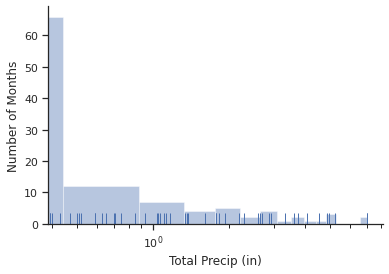

In [24]:
#Create a histogram with seaborn
#aesthetics help https://seaborn.pydata.org/tutorial/aesthetics.html

hist = sns.distplot(santa_clara_monthly_11_20['Total Precip (in)'], kde=False, rug=True)
hist
sns.set()
sns.set_style('dark')
sns.set_style('ticks')
sns.despine()
plt.xscale('log')
plt.xticks()
plt.ylabel('Number of Months')

Text(0.5, 0, 'Normalized against Mean')

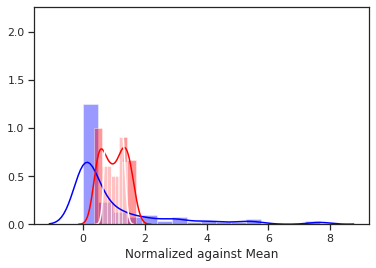

In [25]:
#Putting mult histograms on same axes https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/

#Normalize
norm_precip = santa_clara_monthly_11_20['Total Precip (in)'] / precip_sum[1]
norm_solrad = santa_clara_monthly_11_20['Avg Sol Rad (Ly/day)'] / solrad_sum[1]
norm_wind = santa_clara_monthly_11_20['Avg Wind Speed (mph)'] / wind_sum[1]

plt.figure()
sns.distplot(norm_precip, color='blue')
sns.distplot(norm_solrad, color='red')
sns.distplot(norm_wind, color='white')
sns.set()
sns.set_style('dark')
sns.set_style('ticks')

plt.xlabel('Normalized against Mean')

### Time Series

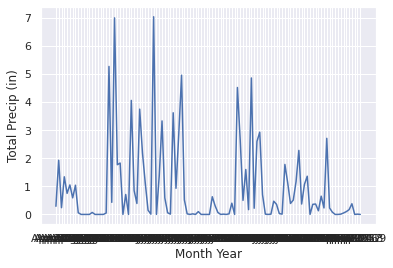

In [26]:
sns.set(style="darkgrid")

sns.lineplot(x=santa_clara_monthly_11_20['Month Year'], y=santa_clara_monthly_11_20['Total Precip (in)'])

In [27]:
#Summarize the data for each year
year_avg_precip = []

#for i in range(length):
  #monthyear = santa_clara_monthly_11_20['Month Year'].iloc[i]
  #print(monthyear)

### Hexbin and other Joint Plots

A bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It’s available through in matplotlib as matplotlib.axes.Axes.hexbin() and as a style in jointplot(). It looks best with a white background:

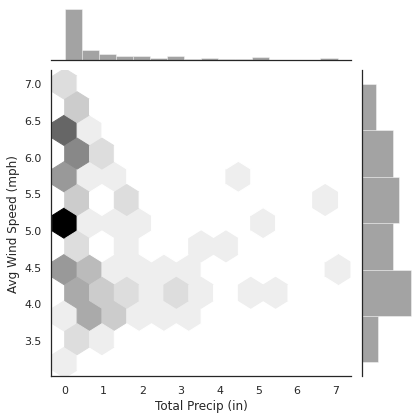

In [28]:
#https://seaborn.pydata.org/tutorial/distributions.html
#https://seaborn.pydata.org/generated/seaborn.jointplot.html 

with sns.axes_style('white'):
  sns.jointplot(x=santa_clara_monthly_11_20['Total Precip (in)'], y=santa_clara_monthly_11_20['Avg Wind Speed (mph)'], kind='hex', color='k')

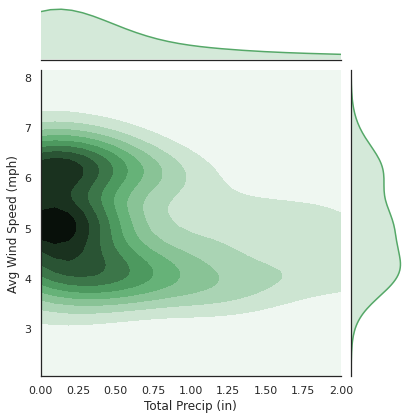

In [29]:
with sns.axes_style('white'):
  green = sns.jointplot(x=santa_clara_monthly_11_20['Total Precip (in)'], y=santa_clara_monthly_11_20['Avg Wind Speed (mph)'], kind='kde', color='g')

green.ax_marg_x.set_xlim(0, 2)
plt.show()

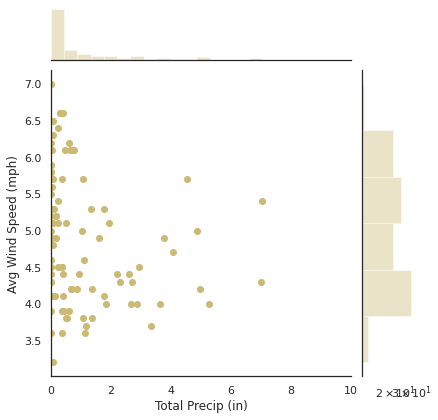

In [30]:
with sns.axes_style('white'):
  yellow = sns.jointplot(x=santa_clara_monthly_11_20['Total Precip (in)'], y=santa_clara_monthly_11_20['Avg Wind Speed (mph)'], color='y')

yellow.ax_marg_x.set_xlim(0, 10)
plt.xscale('log')
plt.show()

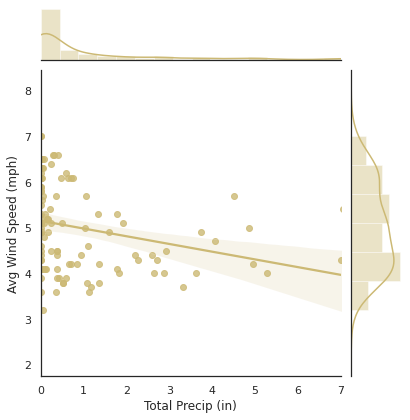

In [31]:
with sns.axes_style('white'):
  yellow2 = sns.jointplot(x=santa_clara_monthly_11_20['Total Precip (in)'], y=santa_clara_monthly_11_20['Avg Wind Speed (mph)'], kind='reg', color='y')

yellow2.ax_marg_x.set_xlim(0, 7)
plt.show()

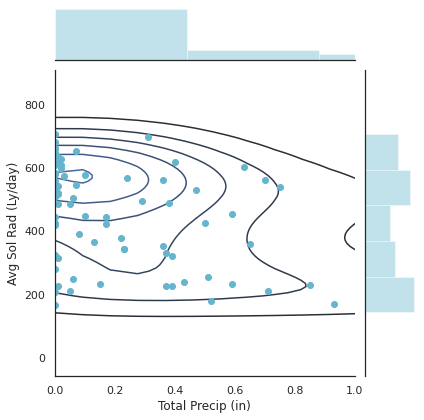

In [32]:
#Scatter plot with joint density estimate

with sns.axes_style('white'):
  cyan = (sns.jointplot(x=santa_clara_monthly_11_20['Total Precip (in)'], y=santa_clara_monthly_11_20['Avg Sol Rad (Ly/day)'], color='c').plot_joint(sns.kdeplot, zorder=0, n_levels=6))

cyan.ax_marg_x.set_xlim(0, 1)
plt.show()

# Penman Monteith Equation

![picture](https://drive.google.com/uc?id=1Yn-xyT0Ig4k2hvN3F8pOnyhyg-3fX8ak)

Watersheds and wetlands homework https://docs.google.com/document/d/1yc-ZM7ZCEDcihHMTFofv3306gWAs71M3Eeo40N9oaks/edit

### Developing Equation

In [33]:
#Penman-Monteith Equation

def penman_monteith(rn, G, es, ea, pa, cp, delta, gamma, rs, ra, latent, ktime):
  upper = ( (delta * (rn - G)) + (ktime * pa * cp * ((es - ea) / rs)) )
  lower = ( delta + (gamma * (1 + (rs / ra))) )
  ET = upper / lower
  return ET

In [34]:
def penman_monteith(T, gamma, u, rn, RH):
  """Calculates the Erc (evapotranspiration of reference crop) using the 
  Penman-Monteith equation
  
  Input units:
  T is temperature in Celsius
  gamma is in units of kPa/C
  u is wind speed in m/s
  rn is provided in W / m^2

  Output is Erc in mm/day
  """
  # Saturation Vapor Pressure
  # Units of kPa
  es = .611 * (math.exp((17.27 * T) / (237.3 + T)))

  # Saturtaion Vapor Pressure - Temperature Gradient
  # Units of kPa / C
  delta = (4098 * es) / (T + 273.3)**2

  # Gamma*
  # Units of kPa / C
  gamma_star = gamma * (1 + ((1/3) * u))

  # Net Radiation
  # Units of MJ / (m^2 * day)
  rn = rn * 60 * 60 * 24 / 1000000

  # Latent Heat of Vaporization
  # Units of MJ/kg
  latent = 2.501 - (2.361 * (10**-3) * T)

  # Term1
  pw = 1000 #density of water in kg/m^3
  Term1 = (1000 * delta) / (pw * latent * (delta + gamma_star))

  # Term2
  Term2 = rn

  # Term3
  Term3 = (gamma / (delta + gamma_star)) * (900 / (T + 275))

  # Term4
  Term4 = u * delta * (1 - RH)

  # Final calculation of Erc in mm/day
  Erc = (Term1 * Term2) + (Term3 * Term4)

  return Erc

In [35]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [36]:
features = ['Stn Id', 'Stn Name', 'CIMIS Region', 'Month Year', 'Total ETo (mm)', 'Total Precip (mm)', 'Avg Sol Rad (W/sq.m)', 'Avg Air Temp (C)', 'Avg Rel Hum (%)', 'Avg Wind Speed (m/s)']

In [37]:
Filename2 = 'CIMIS_0111-0320_Monthly_metric'
link2 = 'https://drive.google.com/open?id=1aM731BzXb_0un1HDhNhJuI9_7W-3PpWU'

In [38]:
discard, id = link2.split('=')

In [39]:
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile(Filename2 + '.csv')
santa_clara_monthly_11_20_metric = pd.read_csv(Filename2 + '.csv')

In [40]:
penman_values = santa_clara_monthly_11_20_metric[features]

In [41]:
length = penman_values.shape[0]
gamma_values = []
# gamma constant units of kPa /C
gamma = .066

for i in range(length):
  gamma_values.append(gamma)

gamma_values = pd.DataFrame(gamma_values)

penman_values = penman_values.join(gamma_values)
penman_values

,Stn Id,Stn Name,CIMIS Region,Month Year,Total ETo (mm),Total Precip (mm),Avg Sol Rad (W/sq.m),Avg Air Temp (C),Avg Rel Hum (%),Avg Wind Speed (m/s),0
0,211,Gilroy,San Francisco Bay,Jan 2011,45.98,34.8,100.0,9.1,78.0,1.9,0.066
1,211,Gilroy,San Francisco Bay,Feb 2011,58.85,103.0,134.0,8.7,69.0,2.1,0.066
2,211,Gilroy,San Francisco Bay,Mar 2011,76.37,114.9,152.0,11.7,76.0,2.5,0.066
3,211,Gilroy,San Francisco Bay,Apr 2011,128.97,7.3,240.0,12.9,66.0,2.9,0.066
4,211,Gilroy,San Francisco Bay,May 2011,149.12,17.7,272.0,13.9,64.0,2.7,0.066
...,...,...,...,...,...,...,...,...,...,...,...
106,211,Gilroy,San Francisco Bay,Nov 2019,64.33,0.1,136.0,11.6,61.0,1.7,0.066
107,211,Gilroy,San Francisco Bay,Dec 2019,34.63,0.0,81.0,10.5,78.0,1.8,0.066
108,211,Gilroy,San Francisco Bay,Jan 2020,35.80,13.2,87.0,9.3,86.0,1.7,0.066
109,211,Gilroy,San Francisco Bay,Feb 2020,73.38,0.1,156.0,9.6,65.0,2.3,0.066


In [42]:
penman_values.rename(columns={0: 'Gamma'}, inplace=True)
penman_values

,Stn Id,Stn Name,CIMIS Region,Month Year,Total ETo (mm),Total Precip (mm),Avg Sol Rad (W/sq.m),Avg Air Temp (C),Avg Rel Hum (%),Avg Wind Speed (m/s),Gamma
0,211,Gilroy,San Francisco Bay,Jan 2011,45.98,34.8,100.0,9.1,78.0,1.9,0.066
1,211,Gilroy,San Francisco Bay,Feb 2011,58.85,103.0,134.0,8.7,69.0,2.1,0.066
2,211,Gilroy,San Francisco Bay,Mar 2011,76.37,114.9,152.0,11.7,76.0,2.5,0.066
3,211,Gilroy,San Francisco Bay,Apr 2011,128.97,7.3,240.0,12.9,66.0,2.9,0.066
4,211,Gilroy,San Francisco Bay,May 2011,149.12,17.7,272.0,13.9,64.0,2.7,0.066
...,...,...,...,...,...,...,...,...,...,...,...
106,211,Gilroy,San Francisco Bay,Nov 2019,64.33,0.1,136.0,11.6,61.0,1.7,0.066
107,211,Gilroy,San Francisco Bay,Dec 2019,34.63,0.0,81.0,10.5,78.0,1.8,0.066
108,211,Gilroy,San Francisco Bay,Jan 2020,35.80,13.2,87.0,9.3,86.0,1.7,0.066
109,211,Gilroy,San Francisco Bay,Feb 2020,73.38,0.1,156.0,9.6,65.0,2.3,0.066


In [43]:
# Testing
T = penman_values['Avg Air Temp (C)'].iloc[0]
u = penman_values['Avg Wind Speed (m/s)'].iloc[0]
rn = penman_values['Avg Sol Rad (W/sq.m)'].iloc[0]
gamma = penman_values['Gamma'].iloc[0]
RH = penman_values['Avg Rel Hum (%)'].iloc[0] / 100

In [44]:
penman_monteith(T, gamma, u, rn, RH)

1.269162172940732

### Running throughout Data with Equation

In [45]:
Erc_values = []

for i in range(length):
  # Get inputs for equation from table
  T = penman_values['Avg Air Temp (C)'].iloc[i]
  u = penman_values['Avg Wind Speed (m/s)'].iloc[i]
  rn = penman_values['Avg Sol Rad (W/sq.m)'].iloc[i]
  gamma = penman_values['Gamma'].iloc[i]
  RH = penman_values['Avg Rel Hum (%)'].iloc[i] / 100
  
  # Calculate the Erc
  Erc = penman_monteith(T, gamma, u, rn, RH)
  Erc_values.append(Erc)

In [46]:
# Adding to DF
Erc_values = pd.DataFrame(Erc_values)

penman_values = penman_values.join(Erc_values)

In [47]:
penman_values = penman_values.rename(columns={0: 'Erc (mm/day)'})

In [48]:
penman_values

,Stn Id,Stn Name,CIMIS Region,Month Year,Total ETo (mm),Total Precip (mm),Avg Sol Rad (W/sq.m),Avg Air Temp (C),Avg Rel Hum (%),Avg Wind Speed (m/s),Gamma,Erc (mm/day)
0,211,Gilroy,San Francisco Bay,Jan 2011,45.98,34.8,100.0,9.1,78.0,1.9,0.066,1.269162
1,211,Gilroy,San Francisco Bay,Feb 2011,58.85,103.0,134.0,8.7,69.0,2.1,0.066,1.636878
2,211,Gilroy,San Francisco Bay,Mar 2011,76.37,114.9,152.0,11.7,76.0,2.5,0.066,1.980621
3,211,Gilroy,San Francisco Bay,Apr 2011,128.97,7.3,240.0,12.9,66.0,2.9,0.066,3.134065
4,211,Gilroy,San Francisco Bay,May 2011,149.12,17.7,272.0,13.9,64.0,2.7,0.066,3.755363
...,...,...,...,...,...,...,...,...,...,...,...,...
106,211,Gilroy,San Francisco Bay,Nov 2019,64.33,0.1,136.0,11.6,61.0,1.7,0.066,1.956028
107,211,Gilroy,San Francisco Bay,Dec 2019,34.63,0.0,81.0,10.5,78.0,1.8,0.066,1.104245
108,211,Gilroy,San Francisco Bay,Jan 2020,35.80,13.2,87.0,9.3,86.0,1.7,0.066,1.133259
109,211,Gilroy,San Francisco Bay,Feb 2020,73.38,0.1,156.0,9.6,65.0,2.3,0.066,1.930446


In [49]:
Erc_sum = penman_values['Erc (mm/day)'].apply(lambda Erc: Erc * 30)
Erc_sum

0       38.074865
1       49.106346
2       59.418637
3       94.021960
4      112.660883
          ...    
106     58.680845
107     33.127341
108     33.997760
109     57.913382
110           NaN
Name: Erc (mm/day), Length: 111, dtype: float64

In [50]:
Erc_sum = pd.DataFrame(Erc_sum)

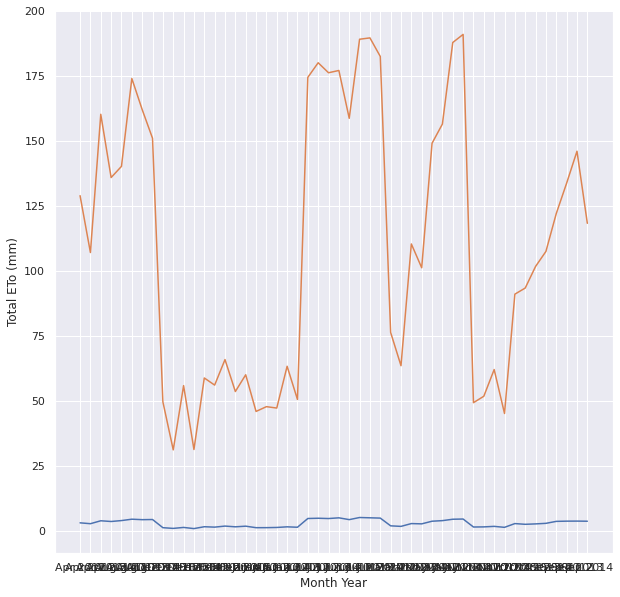

In [56]:
fig = plt.figure(figsize=[10,10])

sns.set(style="darkgrid")

sns.lineplot(x=penman_values['Month Year'].iloc[:50], y=penman_values['Erc (mm/day)'].iloc[:50])
sns.lineplot(x=penman_values['Month Year'].iloc[:50], y=penman_values['Total ETo (mm)'].iloc[:50])